A Survey on Technology Choice
======


In [1]:
library(dplyr)
# For nicer printing
options(digits=2);


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

### Simple questions

- Time to take entire survey?
- Question that took the longest to complete?
- Question that took the least time?
- Top-ranked criteria?
- Demographic distribution by age?

In [3]:
#Q1:
Time = mean(data$End - data$Start, na.rm = TRUE)
print(paste0("Average Time: ", Time))

[1] "Average Time: 680.35652173913"


In [4]:
#Q2:
submit_times <- data[, grep("Submit", colnames(data), value = TRUE)]
submit_times = submit_times[, -c(1)] 
submit_means = apply(submit_times, 2, mean, na.rm = TRUE)
longest = names(submit_means[which(submit_means == max(submit_means))])
print(paste0("The longest to complete", longest))

[1] "The longest to completePG5Submit"


In [5]:
#Q3:
least = names(submit_means[which(submit_means == min(submit_means))])
print(paste0("The least time ", least))

[1] "The least time PG11Submit"


In [6]:
#Q4:
ranked = data[, grep("PG5", colnames(data), value = TRUE)]
ordered = ranked[, grep("Order", colnames(ranked), value = TRUE)]
means = apply(ordered, 2, mean, na.rm = TRUE)
top = names(means[which(means == max(means))])
print(paste0("Top-Ranked: ", top))

[1] "Top-Ranked: PG5_2Order"


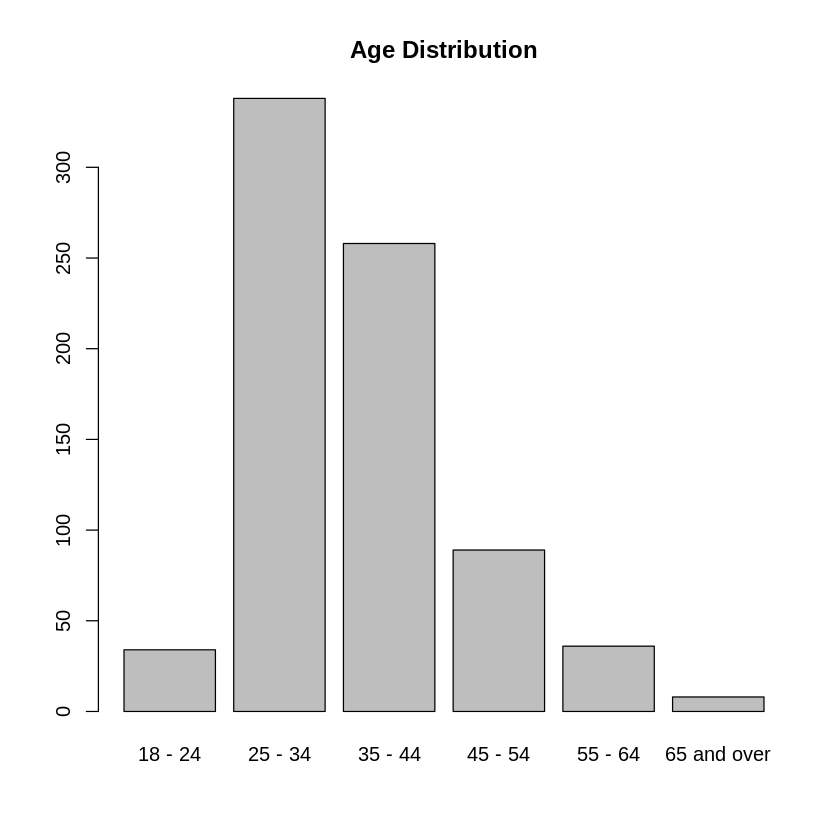

In [7]:
#Q5:
age_data <- select(data, PG12Resp) %>%
    filter(PG12Resp != '')
age_p <- factor(age_data[,])
barplot(table(age_p), main = 'Age Distribution')

## Hypothesis:
I think the priority is going to be effected by the number of forks on github. I think it because a project is whether is base on the number forks.

## Data cleaning
In this part, I'll remove all the data that will not affect the respones.

In [8]:
datas <- select(data, starts_with('PG5'), -ends_with('Order'), -ends_with('Time'), -ends_with('Submit'))
summary(datas)

           PG5_1RRPQ             PG5_2BNUI              PG5_3HDS  
                :877                  :923                  :768  
 Essential      : 60   Essential      :  3   Essential      :103  
 High Priority  :102   High Priority  : 26   High Priority  :200  
 Low Priority   : 85   Low Priority   :121   Low Priority   : 69  
 Medium Priority:134   Medium Priority: 92   Medium Priority:162  
 Not a Priority : 95   Not a Priority :188   Not a Priority : 51  
            PG5_4VGP              PG5_5PHR             PG5_6SSYOP 
                :852                  :753                  :852  
 Essential      : 22   Essential      : 79   Essential      : 63  
 High Priority  :111   High Priority  :252   High Priority  :137  
 Low Priority   : 88   Low Priority   : 63   Low Priority   : 84  
 Medium Priority:164   Medium Priority:162   Medium Priority:110  
 Not a Priority :116   Not a Priority : 44   Not a Priority :107  
           PG5_7NDYP              PG5_8CP               PG5_9F

## Target
This part going to exact the data that relate to the number of forks

In [9]:
datas <- filter(datas, PG5_13NFG != '')
datas$PG5_13NFG <- factor(datas$PG5_13NFG)
summary(datas$PG5_13NFG)

High Priority    Low Priority Medium Priority  Not a Priority 
             10              76              37             310

## Correlation Analysis
Create a function that detects a correlation between variables that is higher than 0.7 and exclude them from the data-set

In [14]:
for(i in colnames(data))
{
    data[,i] <- as.numeric (data[,i]);
}
data <- replace(data, is.na(data), 0)

hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  return(sel)
}
hiCor(data,.7)

Device     Completed         Start           End        PG0Dis 
        FALSE          TRUE         FALSE          TRUE          TRUE 
     PG0Shown     PG0Submit     PG1PsnUse     PG1WdAuth        PG1Trn 
         TRUE         FALSE         FALSE         FALSE         FALSE 
     PG1Other     PG1Submit       PG2Resp     PG2Submit     PG2Resp.1 
        FALSE         FALSE         FALSE         FALSE          TRUE 
    PG3Submit     PG4Dtr0_6     PG4Psv7_8    PG4Prm9_10    PG4AllResp 
         TRUE         FALSE         FALSE          TRUE          TRUE 
    PG4Submit     PG5_1RRPQ    PG5_1Order     PG5_1Time     PG5_2BNUI 
         TRUE          TRUE          TRUE          TRUE          TRUE 
   PG5_2Order     PG5_2Time      PG5_3HDS    PG5_3Order     PG5_3Time 
         TRUE          TRUE          TRUE          TRUE          TRUE 
     PG5_4VGP    PG5_4Order     PG5_4Time      PG5_5PHR    PG5_5Order 
         TRUE          TRUE          TRUE          TRUE          TRUE 
    PG5_5Time    PG5_6SSYOP    PG5_6Order     PG5_6Time     PG5_7NDYP 
         TRUE          TRUE          TRUE          TRUE          TRUE 
   PG5_7Order     PG5_7Time       PG5_8CP    PG5_8Order     PG5_8Time 
         TRUE          TRUE          TRUE          TRUE          TRUE 
     PG5_9FRP    PG5_9Order     PG5_9Time     PG5_10RPA   PG5_10Order 
         TRUE          TRUE          TRUE          TRUE          TRUE 
   PG5_10Time     PG5_11NSG   PG5_11Order    PG5_11Time     PG5_12NWG 
         TRUE          TRUE          TRUE          TRUE          TRUE 
  PG5_12Order    PG5_12Time     PG5_13NFG   PG5_13Order    PG5_13Time 
         TRUE          TRUE          TRUE          TRUE          TRUE 
    PG5Submit       PG6Resp     PG6Submit          PG7R      PG7C.C.. 
         TRUE          TRUE          TRUE          TRUE         FALSE 
      PG7Java     PG7Python PG7Javascript         PG7Go         PG7C. 
        FALSE         FALSE         FALSE         FALSE         FALSE 
     PG7Other     PG7Submit       PG8Resp     PG8Submit       PG9Resp 
        FALSE          TRUE          TRUE          TRUE          TRUE 
    PG9Submit      PG10Resp    PG10Submit      PG11Resp    PG11Submit 
         TRUE          TRUE          TRUE          TRUE          TRUE 
     PG12Resp    PG12Submit 
         TRUE          TRUE

## Model data

In [11]:
MODEL <- lm(PG5_13NFG ~ ., data = datas)
summary(MODEL)


Call:
lm(formula = PG5_13NFG ~ ., data = datas)

Residuals:
   Min     1Q Median     3Q    Max 
-2.267 -0.207  0.187  0.402  2.136 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.55385    0.20976    7.41  7.1e-13 ***
PG5_1RRPQ    0.08655    0.02935    2.95   0.0034 ** 
PG5_2BNUI   -0.01171    0.03449   -0.34   0.7344    
PG5_3HDS     0.00284    0.02857    0.10   0.9210    
PG5_4VGP     0.04921    0.03017    1.63   0.1037    
PG5_5PHR     0.03637    0.03134    1.16   0.2465    
PG5_6SSYOP  -0.03979    0.02803   -1.42   0.1565    
PG5_7NDYP   -0.03305    0.02973   -1.11   0.2668    
PG5_8CP      0.02309    0.02935    0.79   0.4319    
PG5_9FRP    -0.01523    0.03094   -0.49   0.6227    
PG5_10RPA   -0.02421    0.02940   -0.82   0.4107    
PG5_11NSG    0.16386    0.03555    4.61  5.4e-06 ***
PG5_12NWG    0.18780    0.04070    4.61  5.2e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.77 on 420 degre

## Summary